In [ ]:
import numpy as np
import pandas as pd
import os,sys,glob
import matplotlib.pyplot as plt
import glob
import csv
from datetime import datetime
%matplotlib inline

In [3]:
STUDY_PATH=os.path.join('/NAS','coolio','protocoles','CINOCIS')
SCRIPT_PATH=os.path.join(STUDY_PATH,'scripts')
BIDS_PATH=os.path.join(STUDY_PATH,'BIDS')

In [4]:
participants_file = os.path.join(BIDS_PATH, 'participants.tsv')
participants_df = pd.read_csv(participants_file, sep='\t')
print(participants_df)

    participant_id sex
0          sub-001   F
1          sub-002   F
2          sub-003   F
3          sub-004   F
4          sub-005   M
..             ...  ..
220    sub-sub-052   M
221    sub-sub-052   M
222    sub-sub-052   M
223    sub-sub-057   F
224    sub-sub-061   F

[225 rows x 2 columns]


In [8]:
# Drop duplicate participant_id entries
unique_participants_df = participants_df.drop_duplicates(subset='participant_id')

# Write the unique participants to a new TSV file
unique_participants_file = os.path.join(BIDS_PATH, 'unique_participants.tsv')
unique_participants_df.to_csv(unique_participants_file, sep='\t', index=False)

print(f"Unique participants written to {unique_participants_file}")

Unique participants written to /NAS/coolio/protocoles/CINOCIS/BIDS/unique_participants.tsv


In [ ]:
####################################################
ATTENTION ECRITURE DANS DES FICHIERS NE PAS EXECUTER
####################################################

# Define the path pattern for the log files
log_files_pattern = os.path.join(BIDS_PATH, 'derivatives_v2.0', 'micapipe_v0.2.0', 'sub-*', 'ses-*', 'logs', 'proc_structural*.txt')

# Define the output CSV file
output_csv_file = os.path.join(BIDS_PATH, 'derivatives_v2.0', 'micapipe_v0.2.0', 'micapipe_processed_sub.csv')

# Open the CSV file in append mode
with open(output_csv_file, mode='a', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    # Iterate over all log files matching the pattern
    for log_file in glob.glob(log_files_pattern):
        with open(log_file, 'r') as file:
            content = file.read()
            if "Status          : COMPLETED" in content:
                # Extract SUBJ and SES from the file path
                parts = log_file.split(os.sep)
                subj = parts[-4].split('-')[1]
                ses = parts[-3].split('-')[1]
                
                # Define the row to be added
                row = [subj,f" {ses}", 'proc_structural', ' COMPLETED', ' 09/09', ' romain', ' sim', 
                       datetime.now().strftime('%a. %d %b %Y %H:%M:%S CET'), ' 67.567', ' LOCAL', " v0.2.2 'Northern flicker'"]
                
                # Write the row to the CSV file
                csv_writer.writerow(row)

print(f"Log processing completed and results written to {output_csv_file}")

SyntaxError: invalid character '⚠' (U+26A0) (2986244722.py, line 2)

In [ ]:
####################################################
ATTENTION ECRITURE DANS DES FICHIERS NE PAS EXECUTER
####################################################

# Define the path pattern for the new log files
log_files_pattern_post_structural = os.path.join(BIDS_PATH, 'derivatives_v2.0', 'micapipe_v0.2.0', 'sub-*', 'ses-*', 'logs', 'post_structural*.txt')

# Open the CSV file in append mode
with open(output_csv_file, mode='a', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    # Iterate over all log files matching the new pattern
    for log_file in glob.glob(log_files_pattern_post_structural):
        with open(log_file, 'r') as file:
            content = file.read()
            if "Status          : COMPLETED" in content:
                # Extract SUBJ and SES from the file path
                parts = log_file.split(os.sep)
                subj = parts[-4].split('-')[1]
                ses = parts[-3].split('-')[1]
                
                # Define the row to be added
                row = [subj, f"{ses}", 'post_structural', 'COMPLETED', '07/07', 'romain', 'sim', 
                       datetime.now().strftime('%a. %d %b %Y %H:%M:%S CET'), '67.567', 'LOCAL', "v0.2.2 'Northern flicker'"]
                
                # Write the row to the CSV file
                csv_writer.writerow(row)

print(f"Log processing completed and results written to {output_csv_file}")

Log processing completed and results written to /NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/micapipe_v0.2.0/micapipe_processed_sub.csv


In [ ]:
####################################################
ATTENTION ECRITURE DANS DES FICHIERS NE PAS EXECUTER
####################################################

# Define the path pattern for the new log files
log_files_pattern_surf = os.path.join(BIDS_PATH, 'derivatives_v2.0', 'micapipe_v0.2.0', 'sub-*', 'ses-*', 'logs', 'proc_surf_*.txt')

# Open the CSV file in append mode
with open(output_csv_file, mode='a', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    # Iterate over all log files matching the new pattern
    for log_file in glob.glob(log_files_pattern_surf):
        with open(log_file, 'r') as file:
            content = file.read()
            if "Status          : COMPLETED" in content:
                # Extract SUBJ and SES from the file path
                parts = log_file.split(os.sep)
                subj = parts[-4].split('-')[1]
                ses = parts[-3].split('-')[1]
                
                # Define the row to be added
                row = [subj, f"{ses}", 'proc_surf-fastsurfer', 'COMPLETED', '01/01', 'romain', 'sim', 
                       datetime.now().strftime('%a. %d %b %Y %H:%M:%S CET'), '67.567', 'LOCAL', "v0.2.2 'Northern flicker'"]
                
                # Write the row to the CSV file
                csv_writer.writerow(row)

print(f"Log processing completed and results written to {output_csv_file}")

Log processing completed and results written to /NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/micapipe_v0.2.0/micapipe_processed_sub.csv


 # Suppression des composantes connexes inférieurs à 4mm

In [10]:
import nibabel as nib
import scipy.ndimage as ndimage

# Define the path pattern for the lesion segmentation files
lesionseg_files_pattern = os.path.join(BIDS_PATH, 'derivatives_v2.0', 'sct_4.3', 'sub-*', 'ses-M*', 'sub-*lesionseg.nii.gz')

# Iterate over all lesion segmentation files matching the pattern
for lesionseg_file in glob.glob(lesionseg_files_pattern):
    # Load the NIfTI file
    img = nib.load(lesionseg_file)
    data = img.get_fdata()
    
    # Get voxel dimensions (in mm)
    voxel_dims = img.header.get_zooms()
    voxel_volume = np.prod(voxel_dims)
    
    # Label connected components
    labeled_array, num_features = ndimage.label(data)
    
    # Count the number of voxels for each connected component
    voxel_counts = ndimage.sum(data, labeled_array, range(1, num_features + 1))
    
    print(f"File: {lesionseg_file}")
    for i, count in enumerate(voxel_counts, start=1):
        volume_mm3 = count * voxel_volume
        print(f"  Component {i}: {count} / {volume_mm3:.2f} mm³")
        # Threshold volume in mm³
        threshold_volume_mm3 = 4.0
        
        # Create a mask for components larger than the threshold
        mask = np.zeros_like(data, dtype=bool)
        for i, count in enumerate(voxel_counts, start=1):
            volume_mm3 = count * voxel_volume
            if volume_mm3 >= threshold_volume_mm3:
                mask |= (labeled_array == i)
        
        # Create a new NIfTI image with the thresholded data
        thresholded_data = data * mask
        thresholded_img = nib.Nifti1Image(thresholded_data, img.affine, img.header)
        
        # Save the new image
        thresholded_file = lesionseg_file.replace('.nii.gz', '_thres4.nii.gz')
        nib.save(thresholded_img, thresholded_file)
        
        print(f"Thresholded image saved to {thresholded_file}")

File: /NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/sct_4.3/sub-078/ses-M3/sub-078_ses-M3_acq-1501T2W_SPAIR2D_T2w_lesionseg.nii.gz
  Component 1: 6.0 / 4.71 mm³
Thresholded image saved to /NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/sct_4.3/sub-078/ses-M3/sub-078_ses-M3_acq-1501T2W_SPAIR2D_T2w_lesionseg_thres4.nii.gz
  Component 2: 47.0 / 36.91 mm³
Thresholded image saved to /NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/sct_4.3/sub-078/ses-M3/sub-078_ses-M3_acq-1501T2W_SPAIR2D_T2w_lesionseg_thres4.nii.gz
  Component 3: 148.0 / 116.22 mm³
Thresholded image saved to /NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/sct_4.3/sub-078/ses-M3/sub-078_ses-M3_acq-1501T2W_SPAIR2D_T2w_lesionseg_thres4.nii.gz
File: /NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/sct_4.3/sub-078/ses-M3/sub-078_ses-M3_acq-1502T2W_SPAIRtho2D_T2w_cut_lesionseg.nii.gz
  Component 1: 81.0 / 63.61 mm³
Thresholded image saved to /NAS/coolio/protocoles/CINOCIS/BIDS/derivatives_v2.0/sct_4.3/sub

# fusionner les deux volumes (cervical et thoracique coupé)

In [32]:
import nibabel as nib
import numpy as np

# Chemins des fichiers NIfTI à fusionner
file1 = '/NAS/coolio/protocoles/CINOCIS/BIDS/sub-001/ses-M3/anat/sub-001_ses-M3_acq-801T2W_SPAIR2D_T2w.nii.gz'
file2 = '/NAS/coolio/protocoles/CINOCIS/BIDS/sub-001/ses-M3/anat/sub-001_ses-M3_acq-802T2W_SPAIRtho2D_T2w_cut.nii.gz'

# Charger les deux volumes
img1 = nib.load(file1)
img2 = nib.load(file2)

# Extraire les données des volumes
data1 = img1.get_fdata()
data2 = img2.get_fdata()
print(f"Dimensions du volume 1 : {data1.shape}")
print(f"Dimensions du volume 2 : {data2.shape}")

# Vérifier que les dimensions des volumes sont compatibles pour la fusion
if data1.shape != data2.shape:
    raise ValueError("Les dimensions des volumes ne correspondent pas et ne peuvent pas être fusionnées.")

# Fusionner les volumes le long de l'axe z (par exemple)
fused_data = np.concatenate((data1, data2), axis=2)

# Créer une nouvelle image NIfTI avec les données fusionnées
fused_img = nib.Nifti1Image(fused_data, img1.affine, img1.header)

# Chemin pour enregistrer le volume fusionné
fused_file = '/NAS/coolio/protocoles/CINOCIS/sub-001_ses-M3_acq-802T2W_SPAIRtho2D_T2w_fused_img2.nii.gz'

# Enregistrer le volume fusionné
nib.save(fused_img, fused_file)

print(f"Volume fusionné enregistré à {fused_file}")

Dimensions du volume 1 : (512, 512, 12)
Dimensions du volume 2 : (12, 512, 451)


ValueError: Les dimensions des volumes ne correspondent pas et ne peuvent pas être fusionnées.

In [33]:
# Define the path pattern for the labeled segmentation files
labeled_files_pattern = os.path.join(BIDS_PATH, 'derivatives_v2.0', 'sct_4.3_fused', 'sub-*', 'ses-M*', 'sub-*_ses-*_acq*_T2w_fus_seg_labeled.nii.gz')

# Iterate over all labeled segmentation files matching the pattern
for labeled_file in glob.glob(labeled_files_pattern):
    # Load the NIfTI file
    img = nib.load(labeled_file)
    data = img.get_fdata()
    
    unique_values = np.unique(data)
    #{len(unique_values)} {unique_values}
    print(f"{os.path.basename(labeled_file)} ")

File: sub-078_ses-M3_acq-1502T2W_SPAIRtho2D_T2w_fus_seg_labeled.nii.gz Number of labels: 22 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21.]
File: sub-078_ses-M60_acq-1302T2W_SPAIRtho2D_T2w_fus_seg_labeled.nii.gz Number of labels: 22 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21.]
File: sub-126_ses-M3_acq-1502T2W_SPAIRtho2D_T2w_fus_seg_labeled.nii.gz Number of labels: 22 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21.]
File: sub-126_ses-M60_acq-302T2W_SPAIRtho2D_T2w_fus_seg_labeled.nii.gz Number of labels: 11 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
File: sub-107_ses-M3_acq-1502T2W_SPAIRtho2D_T2w_fus_seg_labeled.nii.gz Number of labels: 22 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21.]
File: sub-107_ses-M60_acq-302T2W_SPAIRtho2D_T2w_fus_seg_labeled.nii.gz Number of labels: 22 [ 0.  1.  2.  3.  4.  5.  6.  7.  8. 

### Generation du fichier csv

In [6]:
import pandas as pd
import glob
import os

# Define the path pattern for the CSV files
csv_files_pattern = os.path.join(BIDS_PATH, 'derivatives_v2.0', 'csv', '*.csv')

# Initialize an empty list to store dataframes
dataframes = []

# Iterate over all CSV files matching the pattern
for csv_file in glob.glob(csv_files_pattern):
    # Read the CSV file into a dataframe without headers
    df = pd.read_csv(csv_file, header=None)
    # Transpose the dataframe so that rows become columns
    df_transposed = df.T
    # Set the first row as the header
    df_transposed.columns = df_transposed.iloc[0]
    df_transposed = df_transposed[1:]
    # Add a column with the filename
    df_transposed['filename'] = os.path.basename(csv_file)
    # Append the transposed dataframe to the list
    dataframes.append(df_transposed)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

# Drop the specified columns
columns_to_drop = ['adc_mean_lesion_label_0', 'adc_mean_lesion_label_23', 'adc_mean_label_0', 'adc_mean_label_23']
combined_df.drop(columns=columns_to_drop, inplace=True)

# Set the 'filename' column as the index
combined_df.set_index('filename', inplace=True)
print(combined_df)

# Define the output CSV file path
output_csv_path = os.path.join(BIDS_PATH, 'derivatives_v2.0', 'combined_data.csv')

# Save the combined dataframe to a CSV file
combined_df.to_csv(output_csv_path)

print(f"Combined dataframe saved to {output_csv_path}")

0                                    vol_label_1  vol_label_2  vol_label_3  \
filename                                                                     
sub-066_ses-M3_label_stat_test.csv   1610.541287   1462.91488  1025.532385   
sub-067_ses-M3_label_stat_test.csv   1067.935553  1364.758816  1691.421456   
sub-032_ses-M60_label_stat_test.csv   916.383282  1045.163794  1191.219741   
sub-100_ses-M3_label_stat_test.csv   1128.399379  1264.247043  1089.922296   
sub-078_ses-M60_label_stat_test.csv   906.960111  1229.696566  1129.970216   
...                                          ...          ...          ...   
sub-131_ses-M60_label_stat_test.csv  1004.331025  1052.231097   886.543962   
sub-005_ses-M60_label_stat_test.csv   826.865058    1075.0031  1451.921644   
sub-132_ses-M3_label_stat_test.csv    802.522097  1206.924132  1177.870005   
sub-002_ses-M60_label_stat_test.csv   760.904486  1006.686843  1070.291861   
sub-013_ses-M60_label_stat_test.csv   928.161494  1238.333905  1

In [7]:
combined_df

,vol_label_1,vol_label_2,vol_label_3,vol_label_4,vol_label_5,vol_label_6,vol_label_7,vol_label_8,vol_label_9,vol_label_10,...,adc_mean_lesion_label_13,adc_mean_lesion_label_14,adc_mean_lesion_label_15,adc_mean_lesion_label_16,adc_mean_lesion_label_17,adc_mean_lesion_label_18,adc_mean_lesion_label_19,adc_mean_lesion_label_20,adc_mean_lesion_label_21,adc_mean_lesion_label_22
filename,,,,,,,,,,,,,,,,,,,,,
sub-066_ses-M3_label_stat_test.csv,1610.541287,1462.91488,1025.532385,1210.065394,1014.538929,884.187952,1037.311088,1131.540709,967.424118,1129.970216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-067_ses-M3_label_stat_test.csv,1067.935553,1364.758816,1691.421456,1585.413148,1345.912895,889.684545,1378.108011,1183.366822,1212.420951,1297.227598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-032_ses-M60_label_stat_test.csv,916.383282,1045.163794,1191.219741,1115.05078,1434.64632,1389.101992,1029.458854,943.08168,1098.560592,825.294626,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-100_ses-M3_label_stat_test.csv,1128.399379,1264.247043,1089.922296,1066.364897,984.69925,851.992573,808.804009,788.387597,945.436919,625.056302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-078_ses-M60_label_stat_test.csv,906.960111,1229.696566,1129.970216,1194.360457,1133.89645,1235.97854,1083.640652,1212.421135,1060.868493,797.810799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-131_ses-M60_label_stat_test.csv,1004.331025,1052.231097,886.543962,816.656971,783.676593,972.921141,1620.749989,0.0,741.273251,588.935316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-005_ses-M60_label_stat_test.csv,826.865058,1075.0031,1451.921644,1387.531393,1257.180396,984.699698,693.373073,1028.673528,1078.929334,877.906111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub-132_ses-M3_label_stat_test.csv,802.522097,1206.924132,1177.870005,1338.845573,862.200844,1350.624273,1345.912793,1033.384618,917.168111,1154.312605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# CQ des données extraites visu de quelques colonnes 

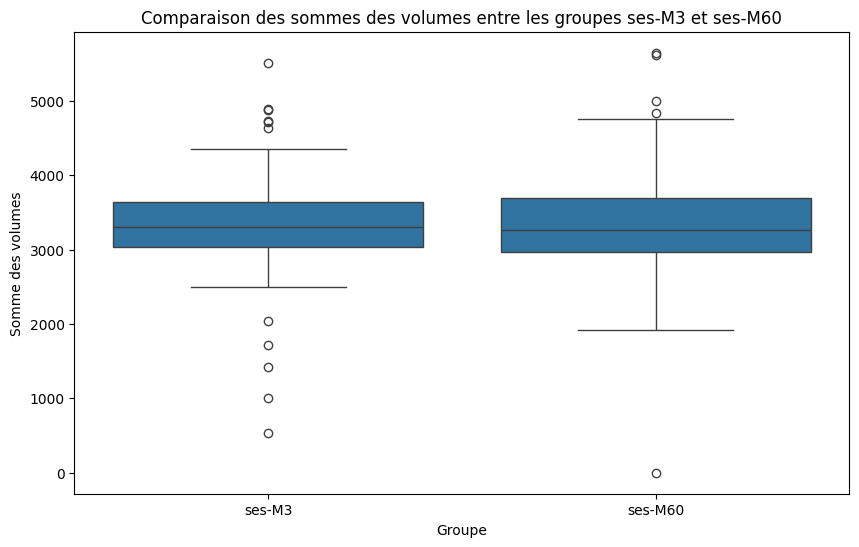

t-statistic: -0.4499266853965314, p-value: 0.6532579925213533


In [9]:
import seaborn as sns
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt

# Ajouter une colonne pour la somme des volumes
combined_df['vol_sum'] = combined_df[['vol_label_1', 'vol_label_2', 'vol_label_3']].astype(float).sum(axis=1)

# Ajouter une colonne pour le groupe (ses-M3 ou ses-M60)
combined_df['group'] = np.where(combined_df.index.str.contains('ses-M3'), 'ses-M3', 'ses-M60')

# Comparaison graphique
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='vol_sum', data=combined_df)
plt.title('Comparaison des sommes des volumes entre les groupes ses-M3 et ses-M60')
plt.xlabel('Groupe')
plt.ylabel('Somme des volumes')
plt.show()

# Comparaison statistique
group_m3 = combined_df[combined_df['group'] == 'ses-M3']['vol_sum'].astype(float)
group_m60 = combined_df[combined_df['group'] == 'ses-M60']['vol_sum'].astype(float)

t_stat, p_value = ttest_ind(group_m3, group_m60)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

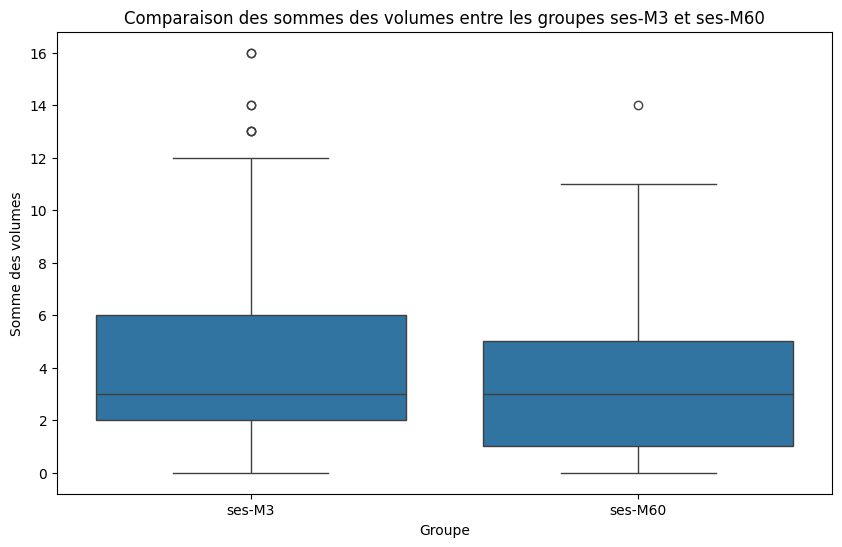

t-statistic: 2.5082687469720084, p-value: 0.012939357123356867


In [12]:
# Comparaison graphique
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='lesion_count_label_1_19', data=combined_df)
plt.title('Comparaison des sommes des volumes entre les groupes ses-M3 et ses-M60')
plt.xlabel('Groupe')
plt.ylabel('Somme des volumes')
plt.show()

# Comparaison statistique
group_m3 = combined_df[combined_df['group'] == 'ses-M3']['lesion_count_label_1_19'].astype(float)
group_m60 = combined_df[combined_df['group'] == 'ses-M60']['lesion_count_label_1_19'].astype(float)

t_stat, p_value = ttest_ind(group_m3, group_m60)
print(f"t-statistic: {t_stat}, p-value: {p_value}")
import plotly.express as px

# Comparaison graphique avec plotly
fig = px.box(combined_df, x='group', y='lesion_count_label_1_19', title='Comparaison des sommes des volumes entre les groupes ses-M3 et ses-M60')
fig.show()

In [16]:
top_three_group_m3 = group_m3.nlargest(10)
print(top_three_group_m3)

filename
sub-023_ses-M3_label_stat_test.csv    16.0
sub-070_ses-M3_label_stat_test.csv    16.0
sub-119_ses-M3_label_stat_test.csv    14.0
sub-033_ses-M3_label_stat_test.csv    14.0
sub-113_ses-M3_label_stat_test.csv    13.0
sub-016_ses-M3_label_stat_test.csv    13.0
sub-124_ses-M3_label_stat_test.csv    13.0
sub-072_ses-M3_label_stat_test.csv    12.0
sub-131_ses-M3_label_stat_test.csv    11.0
sub-097_ses-M3_label_stat_test.csv    10.0
Name: lesion_count_label_1_19, dtype: float64


In [18]:
top_three_group_m60 = group_m60.nlargest(10)
print(top_three_group_m60)

filename
sub-033_ses-M60_label_stat_test.csv    14.0
sub-023_ses-M60_label_stat_test.csv    11.0
sub-123_ses-M60_label_stat_test.csv     9.0
sub-059_ses-M60_label_stat_test.csv     8.0
sub-026_ses-M60_label_stat_test.csv     8.0
sub-097_ses-M60_label_stat_test.csv     7.0
sub-118_ses-M60_label_stat_test.csv     7.0
sub-020_ses-M60_label_stat_test.csv     7.0
sub-060_ses-M60_label_stat_test.csv     7.0
sub-095_ses-M60_label_stat_test.csv     7.0
Name: lesion_count_label_1_19, dtype: float64


In [120]:
def get_vox2ras_tkr(t1):
    '''Get the vox2ras-tkr transform. Inspired
    by get_vox2ras_tkr in
    '''
    ds = t1.header.get_zooms()[:3]
    ns = np.array(t1.shape[:3]) * ds / 2.0
    v2rtkr = np.array([[-ds[0], 0, 0, ns[0]],
                       [0, 0, ds[2], -ns[2]],
                       [0, -ds[1], 0, ns[1]],
                       [0, 0, 0, 1]], dtype=np.float32)
    return v2rtkr

In [160]:
# Créer un nouveau volume avec les mêmes dimensions que lesion_data, initialisé à 0
new_volume = np.zeros_like(lesion_data)

# Mettre les voxels à 1 là où mask=True et lesion_data=1
new_volume[(mask) & (lesion_data == 1)] = 1

# Créer une nouvelle image NIfTI avec le nouveau volume
new_img = nib.Nifti1Image(new_volume, img.affine, img.header)

# Chemin pour enregistrer le nouveau volume
new_volume_file = lesion_file.replace('.nii.gz', '_masked.nii.gz')

# Enregistrer le nouveau volume
nib.save(new_img, new_volume_file)

print(f"Nouveau volume enregistré à {new_volume_file}")

SyntaxError: invalid syntax (10286711.py, line 1)

In [147]:
binary_data = (lesion_data & (labels_data >= 1) & (labels_data <= 19))
print(binary_data.shape)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [132]:
img = nib.load(labeled_file.replace('19.nii','19_std.nii'))
lesion_data = img.get_fdata()
new_vox2ras=get_vox2ras_tkr(img)

# Create a new NIfTI image with the updated vox2ras matrix
new_img = nib.Nifti1Image(lesion_data, new_vox2ras, img.header)

# Save the new image
new_file = lesion_file.replace('.nii.gz', '_new_vox2ras.nii.gz')
nib.save(new_img, new_file)

print(f"Image with updated vox2ras matrix saved to {new_file}")

IndexError: tuple index out of range

# Cartes de chaleur des lesions

In [ ]:
# fais dans CINOCIS_CQ

# extraction FA blanche intacte et blanche lesionnée

# Visu Bvec

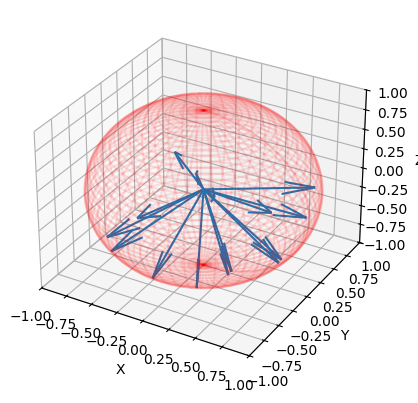

In [184]:
# visualisation des bvec
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# Charger les données du fichier .bvec
bvec_file = '/NAS/coolio/protocoles/CINOCIS/BIDS/sub-076/ses-M60/dwi/sub-076_ses-M60_acq-1701DTICOROSPINE2D_dwi.bvec'
bvecs = np.loadtxt(bvec_file)

# Extraire les coordonnées x, y et z
x, y, z = bvecs

# Créer une figure et un axe 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer les vecteurs sur une sphère
ax.quiver(0, 0, 0, x, y, z, length=1.0, normalize=True)

# Ajouter une sphère pour référence
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
sphere_x = np.cos(u) * np.sin(v)
sphere_y = np.sin(u) * np.sin(v)
sphere_z = np.cos(v)
ax.plot_wireframe(sphere_x, sphere_y, sphere_z, color="r", alpha=0.1)

# Configurer les limites des axes
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Ajouter des étiquettes aux axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Afficher la figure
plt.show()
# Activer l'interactivité
plt.ion()

# Afficher la figure interactive
plt.show()